## SBDS_Capstone_Proejct_1 - Predict Adults with 50K/yr Income - Statistical Analysis

This capstone project is based on dataset called ‘Adult Data Set’ - (http://archive.ics.uci.edu/ml/datasets/Adult) from UCI’s Machine Learning Repository.
This project aims to solve following problems:
1.	Predict whether a person’s income exceed $50K/yr based on the census data
2.	Identify various segments which may exist in the population based on the data collected

We have already completed the Data Wrangling and Data Story part of the project. Now based on the exploratory data analysis done so far, we will first forms some hypothesis based on the results of EDA and then we will apply the infrenetial statstical principals and methods to test the validity of the hypothesis and finally forms some conclusions about the fetures of this dataset which should ultilmately help us in building the requisite Machine Learning models to predict the prices effectively and accurately.

In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import t
from numpy.random import seed
import seaborn as sns
%matplotlib inline

In [295]:
# I will first load data for US Geo and do an EDA for the same
adult = pd.read_csv('adult_csv.csv')

In [296]:
adult.shape

(32561, 15)

In [297]:
pop = 32561

In [298]:
adult.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [299]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [300]:
adult.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [301]:
adult['education-num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8])

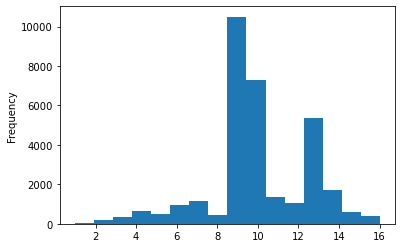

In [302]:
adult['education-num'].plot(kind='hist', bins=16)

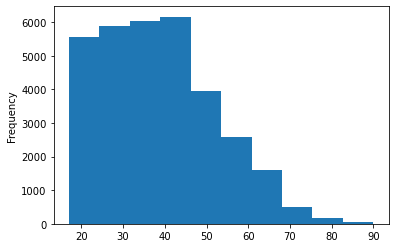

In [303]:
adult.age.plot(kind='hist')

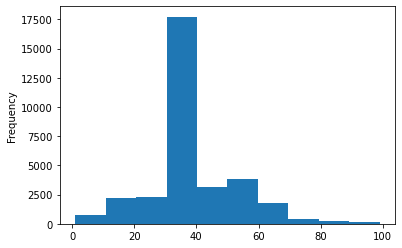

In [304]:
adult['hours-per-week'].plot(kind='hist')

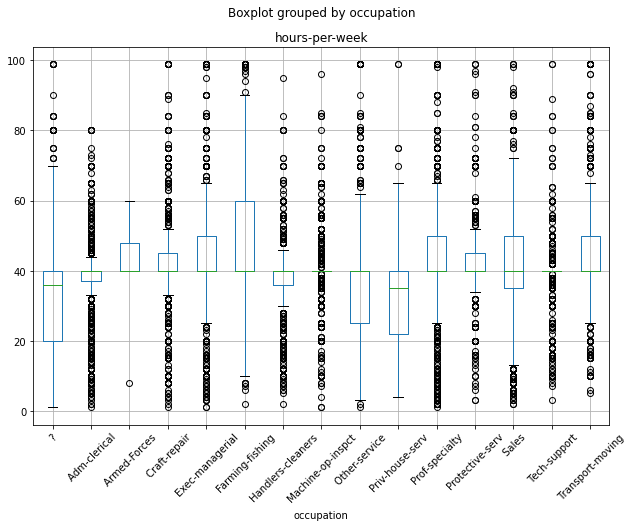

In [305]:
adult.boxplot(column='hours-per-week', by='occupation', figsize=(10,7), rot=45)

### Dropping column 'fnlwgt' from the dataframe
As explained earlier, this column contains the IDs of each reacord and hence cannot be treated as a valid data attribute which can be used in data analysis. Hence we will now drop this data attribute.

In [306]:
adult1 = adult.drop(['fnlwgt'], axis=1)
adult1.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Let's do value counts for all the rest of the columns to visually understand data for each of the attributes

In [307]:
nativec = adult1['native-country'].value_counts(dropna=False)
print(nativec)

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [308]:
age = adult1['age'].value_counts(dropna=False)
print(age)

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64


In [309]:
workclass = adult1['workclass'].value_counts(dropna=False)
print(workclass)

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


### Missing Values
For 1836 respondents the occupation data is missing, we will chage this later to 'not-known'


In [310]:
education = adult1['education'].value_counts(dropna=False)
print(education)

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64


In [311]:
education_num = adult1['education-num'].value_counts(dropna=False)
print(education_num)

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education-num, dtype: int64


In [312]:
marital_status = adult1['marital-status'].value_counts(dropna=False)
print(marital_status)

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64


In [313]:
relationship = adult1['relationship'].value_counts(dropna=False)
print(relationship)

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64


In [314]:
occupation = adult1['occupation'].value_counts(dropna=False)
print(occupation)

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64


In [315]:
race = adult1['race'].value_counts(dropna=False)
print(race)

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64


In [316]:
sex = adult1['sex'].value_counts(dropna=False)
print(sex)

 Male      21790
 Female    10771
Name: sex, dtype: int64


In [317]:
capital_gain = adult1['capital-gain'].value_counts(dropna=False)
print(capital_gain)
no_capgain = 29849/ pop * 100
print(no_capgain)

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: capital-gain, Length: 119, dtype: int64
91.67101747489328


#### Majority of the respondents (29,849, 91%) have reported no ($0) capital-gains

In [318]:
capital_loss = adult1['capital-loss'].value_counts(dropna=False)
print(capital_loss)
no_caploss = 31042/pop * 100
print(no_caploss)

0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: capital-loss, Length: 92, dtype: int64
95.33490986149073


#### Majority of the respondents (29,849, 95%) have reported no ($0) capital-loss either

### Considering the fact that most of the respondents in the dataset did not have capital-gain or capital-loss, we may drop these 2 columns from the table later since data from these columns does not truly represent the population and in fact can be almost categorized as outliers.

In [319]:
income = adult1['income'].value_counts(dropna=False)
print(income)

 <=50K    24720
 >50K      7841
Name: income, dtype: int64


#### Majority of the population - 24,720 people (76%) falls in the low income, <=50K group, with rest of the population - 7841 people (24%) falling in high income, >50K group

In [320]:
hours = adult1['hours-per-week'].value_counts()
print(hours)

40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
92        1
94        1
87        1
74        1
82        1
Name: hours-per-week, Length: 94, dtype: int64


#### As explained before let's drop capital-gain and capital-loss columns so that plots such as bocplots can be plotted and interpreted more effectively.

In [321]:
#create a copy similar to adult2 table
adult3 = adult.drop(['fnlwgt', 'capital-gain', 'capital-loss'], axis=1)
adult3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   hours-per-week  32561 non-null  int64 
 10  native-country  32561 non-null  object
 11  income          32561 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


### Now let's change the data type of non-integer attributes from 'object' to 'category' for ease of processing later

In [322]:
adult3.workclass = adult3.workclass.astype('category')
adult3.education = adult3.education.astype('category')
adult3['marital-status'] = adult3['marital-status'].astype('category')
adult3.sex = adult3.sex.astype('category')
adult3.occupation = adult3.occupation.astype('category')
adult3.relationship = adult3.relationship.astype('category')
adult3.race = adult3.race.astype('category')
adult3['native-country'] = adult3['native-country'].astype('category')
#adult3.income = adult3.income.astype('category')

In [323]:
adult3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       32561 non-null  category
 2   education       32561 non-null  category
 3   education-num   32561 non-null  int64   
 4   marital-status  32561 non-null  category
 5   occupation      32561 non-null  category
 6   relationship    32561 non-null  category
 7   race            32561 non-null  category
 8   sex             32561 non-null  category
 9   hours-per-week  32561 non-null  int64   
 10  native-country  32561 non-null  category
 11  income          32561 non-null  object  
dtypes: category(8), int64(3), object(1)
memory usage: 1.2+ MB


#### As you can see above, all the non-integer objects have been converted to 'category' data type and as a result the memory usage reduced from a previous value of 3.0+ MB to 1.2+ MB, a significant reduction indeed (60% reduction)

In [324]:
adult3.describe()

,age,education-num,hours-per-week
count,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,40.437456
std,13.640433,2.572720,12.347429
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,48.000000,12.000000,45.000000
max,90.000000,16.000000,99.000000


In [325]:
adult3.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


age                  AxesSubplot(0.125,0.125;0.227941x0.755)
education-num     AxesSubplot(0.398529,0.125;0.227941x0.755)
hours-per-week    AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

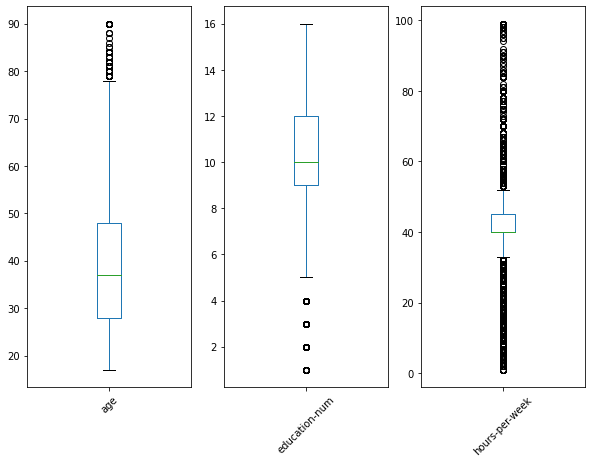

In [326]:
adult3.plot(kind='box', figsize=(10,7), rot=45, subplots=True)

### Next we will change the values <=50K and >50K to 0 and 1 repsectively, so that these values can then be utilized easily for EDA and ML modeling later

In [327]:
adult4=adult3.copy()
adult4.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


#### Now let's convert all the non-integer attributes in to categories from objects. This wouold help in reduced usage of memory and also in running advanced statistical and machine learning model.

In [328]:
replace_map = {'income':{'<=50K' : 0, '>50K' : 1}}
adult4.replace(replace_map, inplace=True, regex=True)
adult4.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0


### Further Numerical and Visual Data Analysis of the 2 income groups

In [329]:
adult4agg1 = adult4.groupby('income')['age'].mean()
adult4agg1.head()

income
0    36.783738
1    44.249841
Name: age, dtype: float64

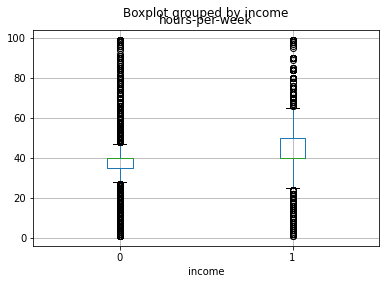

In [330]:
adult4.boxplot(column='hours-per-week', by='income')

### Number of hours clocked by <= 50K and >50K group
The >50K income group clearly has people who are clocking many more hours than people from <=50K income group. The average # of hours are more than 40 hours in high income group vs. an average of less than 40 hours in low income group

In [331]:
adult4agg2 = adult4.groupby('income')['hours-per-week'].mean()
adult4agg2.head()

income
0    38.840210
1    45.473026
Name: hours-per-week, dtype: float64

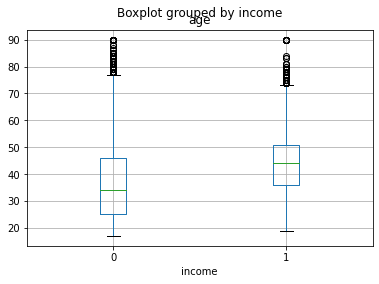

In [332]:
adult4.boxplot(column='age', by='income')

### Age distribution among <= 50K and >50K segments
The >50K income group clearly has people with higher age than people from <=50K income group. The average age is 44.25 years in high income group vis-a-vis average age of 36.87 years in low income group

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

<Figure size 720x360 with 0 Axes>

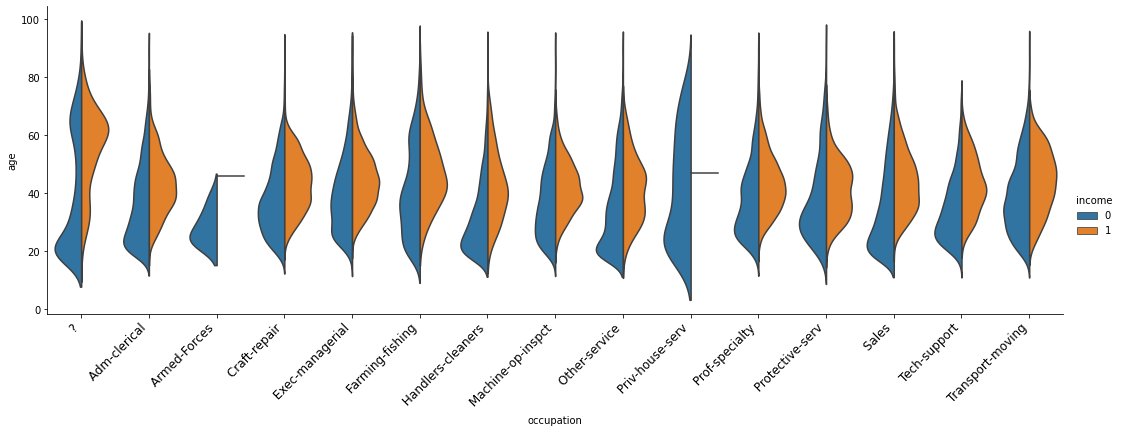

In [333]:
plt.figure(figsize=(10,5))
g= sns.catplot(x='occupation', y='age', hue='income', kind='violin', inner=None, split=True, data=adult4, height=5, aspect=3)
#sns.swarmplot(x='occupation', y='age', color='k', size=0.5, data=adult4, ax=g.ax)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large')

#### The overall trend of age difference between higher income group and lower income group continues across various occupation categories as well

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

<Figure size 720x360 with 0 Axes>

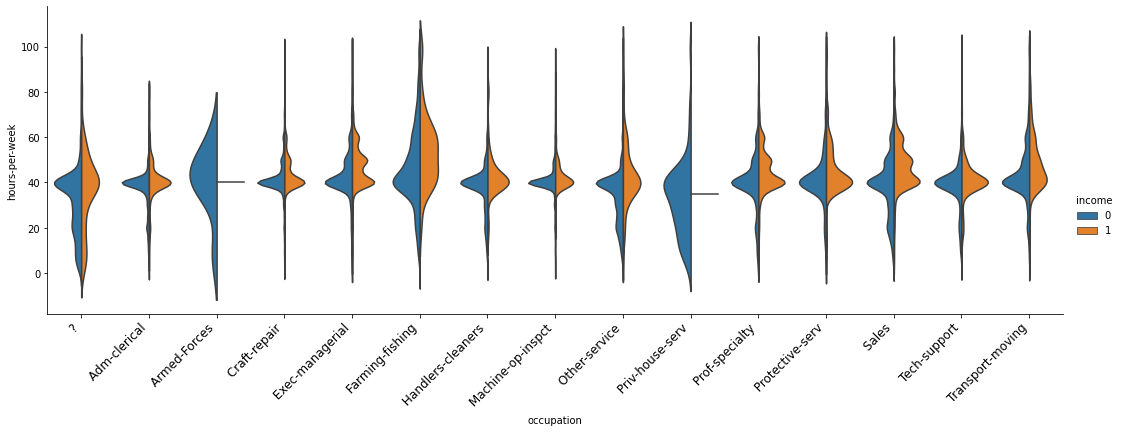

In [334]:
plt.figure(figsize=(10,5))
g= sns.catplot(x='occupation', y='hours-per-week', hue='income', kind='violin', inner=None, split=True, data=adult4, height=5, aspect=3)
#sns.swarmplot(x='occupation', y='age', color='k', size=0.5, data=adult4, ax=g.ax)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large')

#### The overall trend of 'hours worked per week' difference between higher income group and lower income group continues across various occupation categories as well

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

<Figure size 720x360 with 0 Axes>

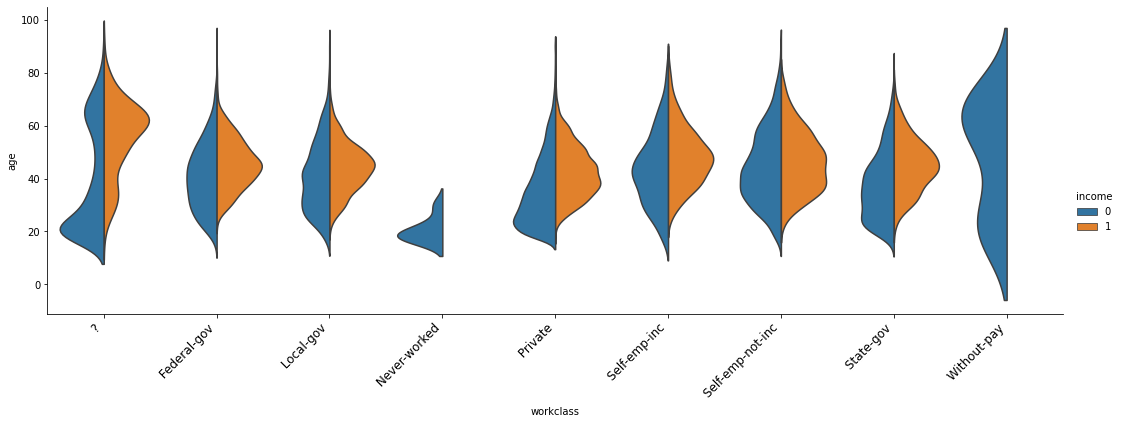

In [335]:
plt.figure(figsize=(10,5))
g= sns.catplot(x='workclass', y='age', hue='income', kind='violin', inner=None, split=True, data=adult4, height=5, aspect=3)
#sns.swarmplot(x='occupation', y='age', color='k', size=0.5, data=adult4, ax=g.ax)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large')

#### Across the workclassses, for higher income group, the age is more skewed towards higher values. The overall age difference between low income group and high income group seems to be substantial. Lower income group is more concentrated between 20 to 40 years age block vs. higher income group which is more concentrated betweem 40 to 60 age block 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

<Figure size 720x360 with 0 Axes>

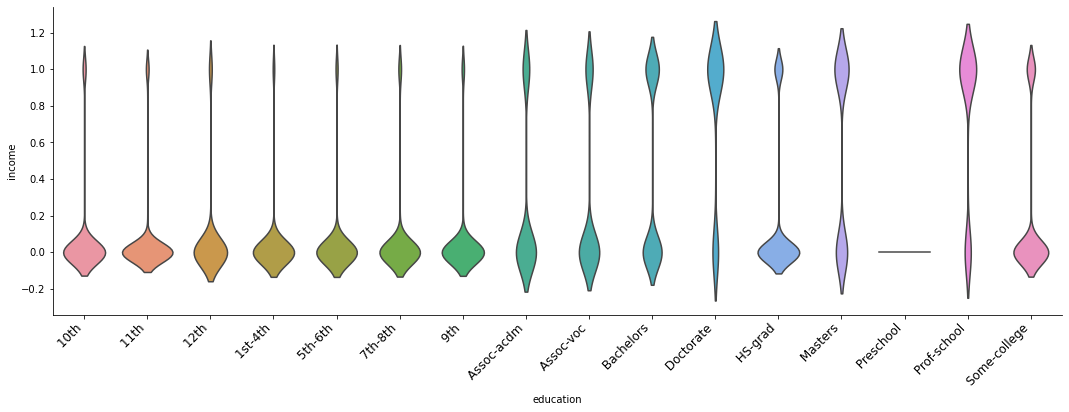

In [336]:
plt.figure(figsize=(10,5))
g= sns.catplot(x='education', y='income', hue=None, kind='violin', inner=None, split=False, data=adult4, height=5, aspect=3)
#sns.swarmplot(x='occupation', y='age', color='k', size=0.5, data=adult4, ax=g.ax)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large')

#### Education level clearly seems to influence income group as lower education categories have lower income and viceversa

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

<Figure size 720x360 with 0 Axes>

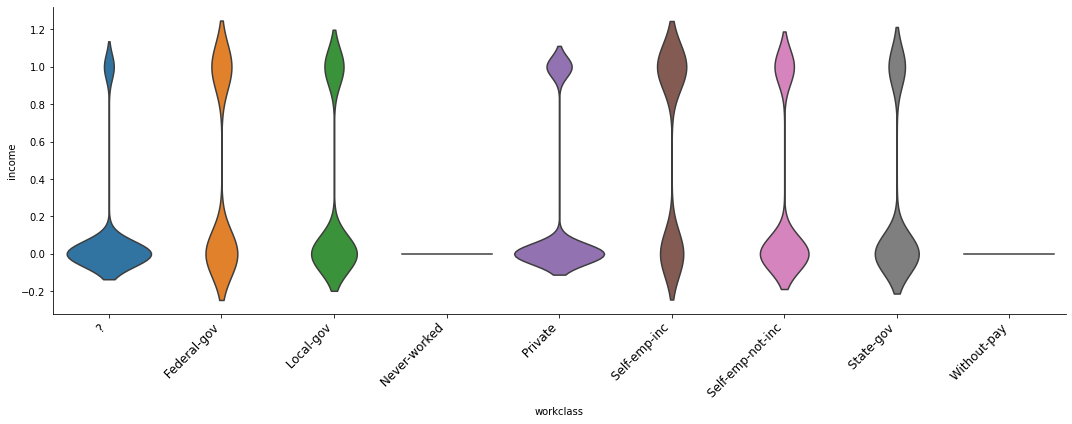

In [337]:
plt.figure(figsize=(10,5))
g= sns.catplot(x='workclass', y='income', hue=None, kind='violin', inner=None, split=False, data=adult4, height=5, aspect=3)
#sns.swarmplot(x='occupation', y='age', color='k', size=0.5, data=adult4, ax=g.ax)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large')

#### Workclass does not seem to imact income group to a great extent

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

<Figure size 720x360 with 0 Axes>

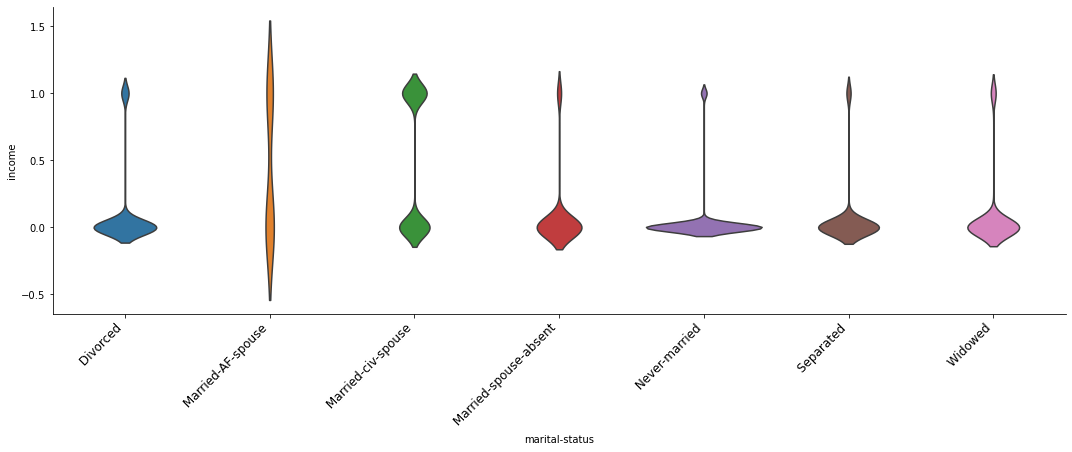

In [338]:
plt.figure(figsize=(10,5))
g= sns.catplot(x='marital-status', y='income', hue=None, kind='violin', inner=None, split=False, data=adult4, height=5, aspect=3)
#sns.swarmplot(x='occupation', y='age', color='k', size=0.5, data=adult4, ax=g.ax)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large')

#### Marital-status does not seem to some impact on income group. Specifically 'Married with Civilian Spouse' group which clearly shows higher proportion of distribution in high income group. For rest of the categories, majority of the population lies in low income group.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

<Figure size 720x360 with 0 Axes>

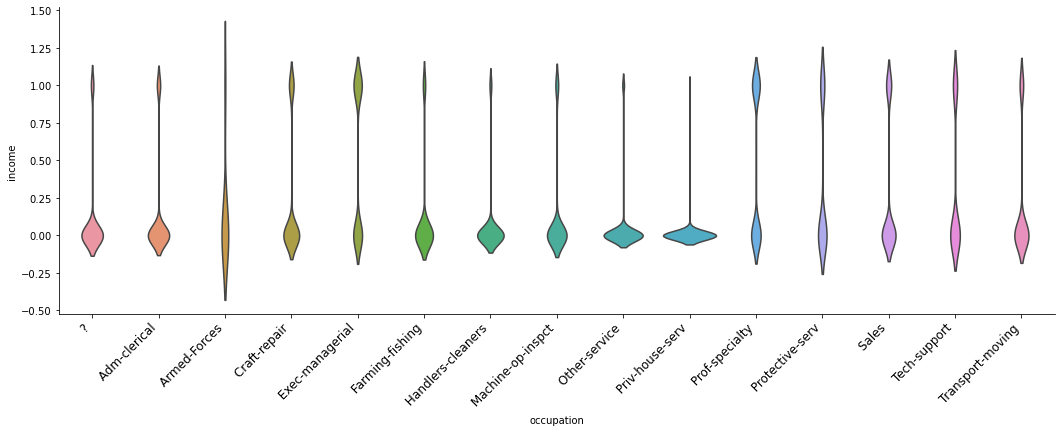

In [339]:
plt.figure(figsize=(10,5))
g= sns.catplot(x='occupation', y='income', hue=None, kind='violin', inner=None, split=False, data=adult4, height=5, aspect=3)
#sns.swarmplot(x='occupation', y='age', color='k', size=0.5, data=adult4, ax=g.ax)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large')

#### Following occupation show more proportion people falling in high income group - prof-speaciality, protective services, Sales, Tech Support and Transport-moving

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

<Figure size 720x360 with 0 Axes>

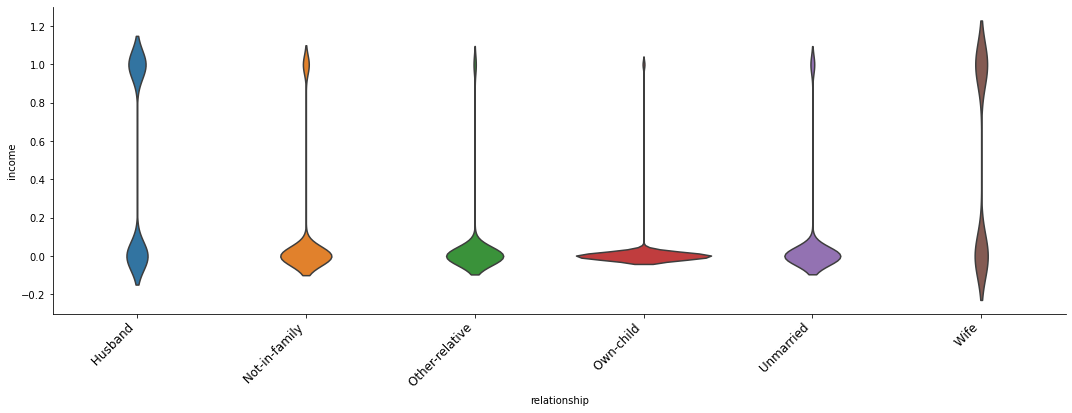

In [340]:
plt.figure(figsize=(10,5))
g= sns.catplot(x='relationship', y='income', hue=None, kind='violin', inner=None, split=False, data=adult4, height=5, aspect=3)
#sns.swarmplot(x='occupation', y='age', color='k', size=0.5, data=adult4, ax=g.ax)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large')

#### Husband-Wife category expectedly have higher income (possibly because they makeup the married with civilian wife group which has higher income as per the earlier chart)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

<Figure size 720x360 with 0 Axes>

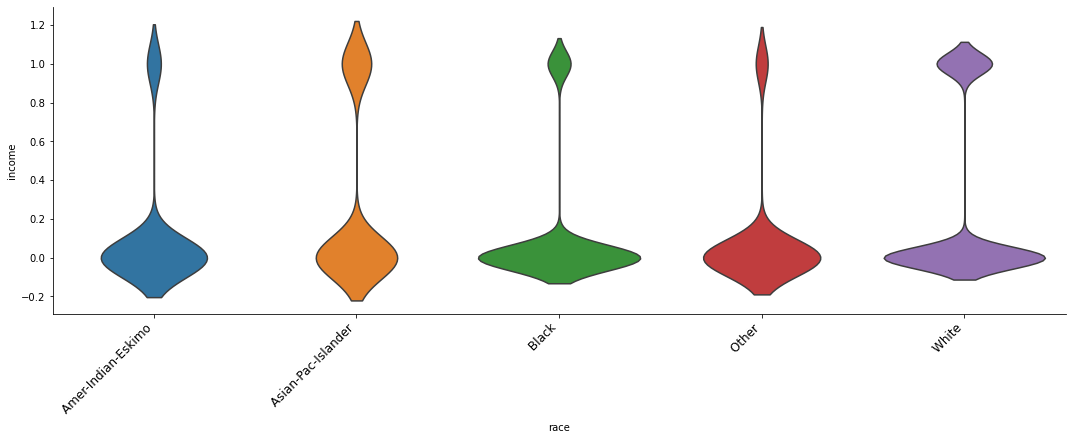

In [341]:
plt.figure(figsize=(10,5))
g= sns.catplot(x='race', y='income', hue=None, kind='violin', inner=None, split=False, data=adult4, height=5, aspect=3)
#sns.swarmplot(x='occupation', y='age', color='k', size=0.5, data=adult4, ax=g.ax)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large')

#### There is more representation of white and Asian Pacific Islander among high income group. Where all other races are more represented by lower income group

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

<Figure size 720x360 with 0 Axes>

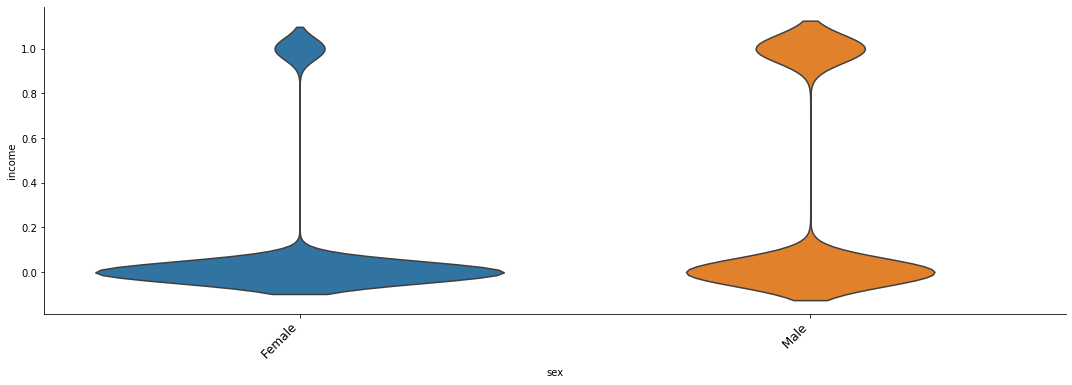

In [342]:
plt.figure(figsize=(10,5))
g= sns.catplot(x='sex', y='income', hue=None, kind='violin', inner=None, split=False, data=adult4, height=5, aspect=3)
#sns.swarmplot(x='occupation', y='age', color='k', size=0.5, data=adult4, ax=g.ax)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large')

#### Females have a significantly lower representation in higher income group compared to Males

38.58164675532078
13.640223092304081


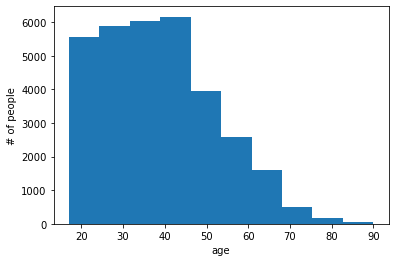

In [343]:
plt.hist(adult4.age)
plt.xlabel('age')
plt.ylabel('# of people')
age_mean = np.mean(adult4.age)
print(age_mean)
age_std = np.std(adult4.age)
print(age_std)

Text(0, 0.5, '# of people')

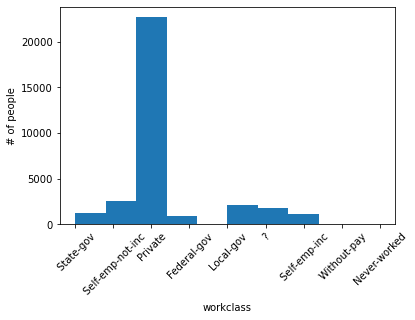

In [344]:
plt.hist(adult4.workclass)
plt.xticks(rotation=45)
plt.xlabel('workclass')
plt.ylabel('# of people')

Text(0, 0.5, '# of people')

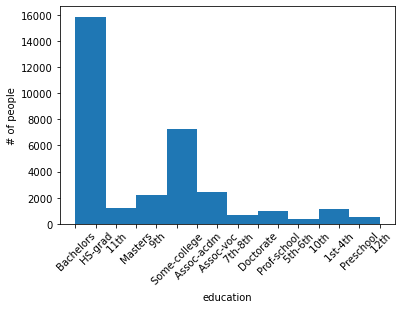

In [345]:
plt.hist(adult4.education)
plt.xticks(rotation=45)
plt.xlabel('education')
plt.ylabel('# of people')

Text(0, 0.5, '# of people')

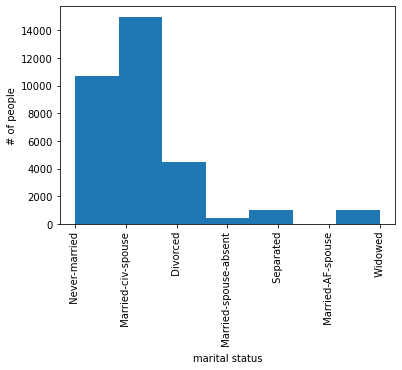

In [346]:
plt.hist(adult4['marital-status'], bins=7)
plt.xticks(rotation=90)
plt.xlabel('marital status')
plt.ylabel('# of people')

Text(0, 0.5, '# of people')

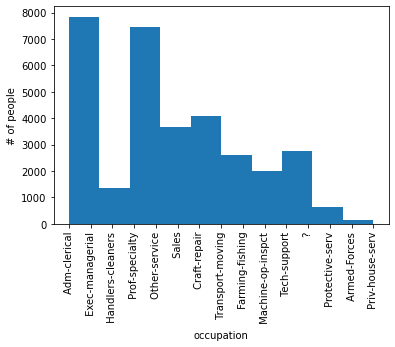

In [347]:
plt.hist(adult4.occupation)
plt.xticks(rotation=90)
plt.xlabel('occupation')
plt.ylabel('# of people')

Text(0, 0.5, '# of people')

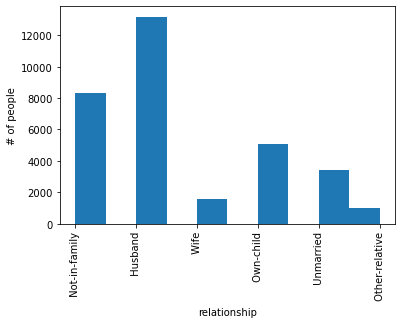

In [348]:
plt.hist(adult4.relationship)
plt.xticks(rotation=90)
plt.xlabel('relationship')
plt.ylabel('# of people')

Text(0, 0.5, '# of people')

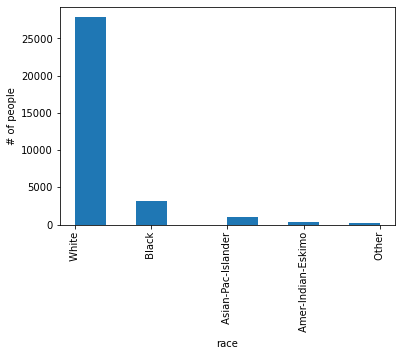

In [349]:
plt.hist(adult4.race)
plt.xticks(rotation=90)
plt.xlabel('race')
plt.ylabel('# of people')

Text(0, 0.5, '# of people')

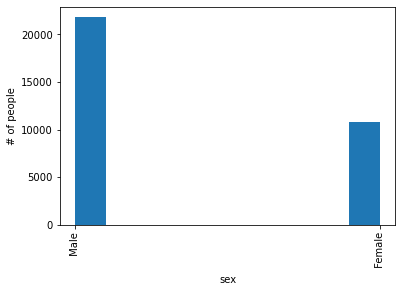

In [350]:
plt.hist(adult4.sex)
plt.xticks(rotation=90)
plt.xlabel('sex')
plt.ylabel('# of people')

40.437455852092995
13.640223092304081


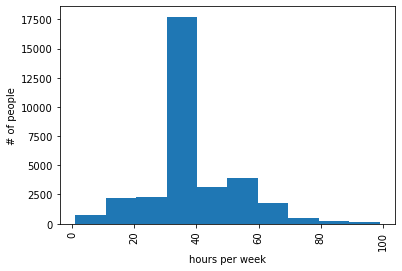

In [351]:
plt.hist(adult4['hours-per-week'])
plt.xticks(rotation=90)
plt.xlabel('hours per week')
plt.ylabel('# of people')
hours_mean = np.mean(adult4['hours-per-week'])
print(hours_mean)
hours_std = np.std(adult4.age)
print(hours_std)


Text(0, 0.5, '# of people')

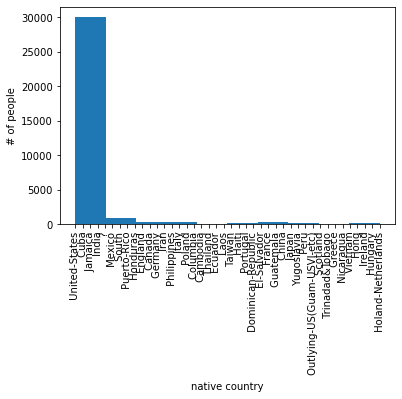

In [352]:
plt.hist(adult4['native-country'])
plt.xticks(rotation=90)
plt.xlabel('native country')
plt.ylabel('# of people')

Text(0, 0.5, '# of people')

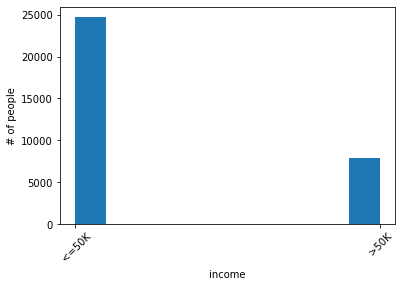

In [353]:
plt.hist(adult3.income)
plt.xticks(rotation=45)
plt.xlabel('income')
plt.ylabel('# of people')

#### __Initial Analysis based on the charts__
The charts above illustrate how the distrubution of people for each of the attributes (feature) is in the dataset. Following are the key observations
1. For attribute 'native-country' the dominating value is USA
2. For attribute 'hours-per-week' the dominating value is @40 hours
3. For attribite 'race' the dominating value is for White race.
For these attributes, lateron we will see if we can aggregate the 'other' values in one attribute (e.g. for native-country we could divide the dataset between 'USA' and 'NonUSA')
4. For all other attributes the data is spread across many categories. Thus we will have to do further analysis for all these categorical attributes to find out their influence on income.

In [354]:
adult5 = adult4.copy()
adult5.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0


In [355]:
adult5['native'] = adult5['native-country'].copy()
adult5['native'] = adult5['native'].astype('object')
adult5.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,native
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0,Cuba


In [356]:
adult5.native.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [357]:
replace_map = {'native':{'United-States':'US', 'Cuba':'NonUS','Jamaica':'NonUS', 'India':'NonUS', '\?':'NonUS', 'Mexico':'NonUS',
       'South':'NonUS', 'Puerto-Rico':'NonUS', 'Honduras':'NonUS', 'England':'NonUS', 'Canada':'NonUS',
       'Germany':'NonUS', 'Iran':'NonUS', 'Philippines':'NonUS', 'Italy':'NonUS', 'Poland':'NonUS',
       'Columbia':'NonUS', 'Cambodia':'NonUS', 'Thailand':'NonUS', 'Ecuador':'NonUS', 'Laos':'NonUS',
       'Taiwan':'NonUS', 'Haiti':'NonUS', 'Portugal':'NonUS', 'Dominican-Republic':'NonUS',
       'El-Salvador':'NonUS', 'France':'NonUS', 'Guatemala':'NonUS', 'China':'NonUS', 'Japan':'NonUS',
       'Yugoslavia':'NonUS', 'Peru':'NonUS', 'Outlying-US\(Guam-USVI-etc\)':'NonUS', 'Scotland':'NonUS',
       'Trinadad&Tobago':'NonUS', 'Greece':'NonUS', 'Nicaragua':'NonUS', 'Vietnam':'NonUS', 'Hong':'NonUS',
       'Ireland':'NonUS', 'Hungary':'NonUS', 'Holand-Netherlands':'NonUS'}}
adult5.replace(replace_map, inplace=True, regex=True)
adult5.head()
# Please note the backslash used for '\?' and 'Outlying-US\(Guam-USVI-etc\)' so that those charecters are escaped while executing this command.

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,native
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0,US
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0,US
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0,US
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0,US
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0,NonUS


Text(0, 0.5, '# of people')

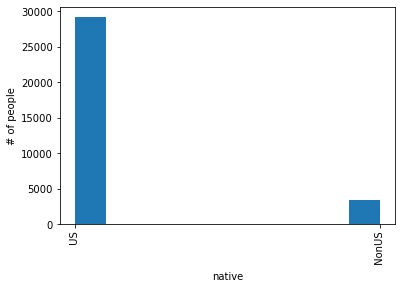

In [358]:
plt.hist(adult5['native'])
plt.xticks(rotation=90)
plt.xlabel('native')
plt.ylabel('# of people')

### Stastical Analysis

### Let's do the analysis of how attributes age, education-num, hours-per-week differe between people with <=50K and >50K income

In [359]:
n = adult5.income.count()
print(n)

32561


In [360]:
confidence = 0.95
zscore = 1.96

In [361]:
highinc = adult5[adult5.income==1]
print(highinc.shape)
print(highinc.describe())
highinc.head()

(7841, 13)
               age  education-num  hours-per-week  income
count  7841.000000    7841.000000     7841.000000  7841.0
mean     44.249841      11.611657       45.473026     1.0
std      10.519028       2.385129       11.012971     0.0
min      19.000000       2.000000        1.000000     1.0
25%      36.000000      10.000000       40.000000     1.0
50%      44.000000      12.000000       40.000000     1.0
75%      51.000000      13.000000       50.000000     1.0
max      90.000000      16.000000       99.000000     1.0


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,native
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,1,US
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,1,US
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,1,US
10,37,Private,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,1,US
11,30,State-gov,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,40,India,1,NonUS


In [362]:
lowinc = adult5[adult5.income==0]
print(lowinc.shape)
print(lowinc.describe())
lowinc.head()

(24720, 13)
                age  education-num  hours-per-week   income
count  24720.000000   24720.000000    24720.000000  24720.0
mean      36.783738       9.595065       38.840210      0.0
std       14.020088       2.436147       12.318995      0.0
min       17.000000       1.000000        1.000000      0.0
25%       25.000000       9.000000       35.000000      0.0
50%       34.000000       9.000000       40.000000      0.0
75%       46.000000      10.000000       40.000000      0.0
max       90.000000      16.000000       99.000000      0.0


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,native
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0,US
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0,US
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0,US
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0,US
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0,NonUS


### __Age__

In [363]:
age_highinc_mean = np.mean(highinc.age)
age_highinc_std = np.std(highinc.age)
print("Mean of age of people with high income is ", age_highinc_mean)
print("Standard Deviation of age of people with high income is ", age_highinc_std)


Mean of age of people with high income is  44.24984058155847
Standard Deviation of age of people with high income is  10.518356927661575


In [364]:
age_lowinc_mean = np.mean(lowinc.age)
age_lowinc_std = np.std(lowinc.age)
print("Mean of age of people with low income is ", age_lowinc_mean)
print("Standard Deviation of age of people with low income is ", age_lowinc_std)

Mean of age of people with low income is  36.78373786407767
Standard Deviation of age of people with low income is  14.019804910115214


__Next Steps__ Let's state the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

Initially let's assume that the variances of the two groups are equal?

__Null Hypothesis__ : There is no significant difference between the age distribution between people with high income vs. people with low income.

__Alternate Hypothesis__: There is a significant difference between the age distribution between people with high income vs. people with low income.

In [365]:
n0, x0, s0 = 7841, age_highinc_mean, age_highinc_std
n1, x1, s1 = 24720, age_lowinc_mean, age_lowinc_std
Sp = np.sqrt(((n0 - 1)*(s0**2) + (n1 - 1)*(s1**2))/(n0+n1-2))
print("Pooled Standard Deviation of the two groups (Sp) is", Sp)

Pooled Standard Deviation of the two groups (Sp) is 13.261453837048414


In [366]:
t1 = (x0 - x1)/(Sp*(np.sqrt(1/n0 + 1/n1)))
print("t-test statistic = {} and pvalue = 0.00".format(t1))

t-test statistic = 43.43740936207961 and pvalue = 0.00


In [367]:
t2 = scipy.stats.ttest_ind_from_stats(x0, s0, n0, x1, s1, n1)
print("t2 = ", t2)

t2 =  Ttest_indResult(statistic=43.43740936207961, pvalue=0.0)


Now we will recalculate the t value without assuming that the variances of the two groups are equal

In [368]:
t3 = scipy.stats.ttest_ind_from_stats(x0, s0, n0, x1, s1, n1, equal_var=False)
print("t3 = ", t3)

t3 =  Ttest_indResult(statistic=50.26662666736956, pvalue=0.0)


#### Conclusion
The 't-value' as calculated by the 3 methods above (t1 = 43.44, t2 = 43.44, t3= 50.27) is significantly higher compared to the mean value of the two groups (mean age value of high income group = 44.25 and mean age value of low income group = 36.78). Also the p-value (the probablity of t value being so high due to the random sampling wrror is given as 0.00), which establishes the fact that the difference in the menas is signnificant.

Considering the results above, we reject the __Null Hypothesis__ that there is no signnificant difference between the age distribution of 2 groups and accept the __Alternate Hypothesis__ that there is indeed a significant difference between the age distribution of High Income and Low Income groups.

It is clear that there is significant difference in the age distribution between the high income group and low income group. It is unlikely that this difference has occured because of sampling or expreimental error.

### __Education__

In [369]:
edu_highinc_mean = np.mean(highinc['education-num'])
edu_highinc_std = np.std(highinc['education-num'])
print("Mean of education of people with high income is ", edu_highinc_mean)
print("Standard Deviation of education of people with high income is ", edu_highinc_std)

Mean of education of people with high income is  11.611656676444332
Standard Deviation of education of people with high income is  2.3849765344197147


In [370]:
edu_lowinc_mean = np.mean(lowinc['education-num'])
edu_lowinc_std = np.std(lowinc['education-num'])
print("Mean of education of people with low income is ", edu_lowinc_mean)
print("Standard Deviation of education of people with low income is ", edu_lowinc_std)

Mean of education of people with low income is  9.595064724919094
Standard Deviation of education of people with low income is  2.4360975169965515


In [371]:
n0, x0, s0 = 7841, edu_highinc_mean, edu_highinc_std
n1, x1, s1 = 24720, edu_lowinc_mean, edu_lowinc_std
Sp = np.sqrt(((n0 - 1)*(s0**2) + (n1 - 1)*(s1**2))/(n0+n1-2))
print("Pooled Standard Deviation of the two groups (Sp) is", Sp)

Pooled Standard Deviation of the two groups (Sp) is 2.4238864627040697


In [372]:
t1 = (x0 - x1)/(Sp*(np.sqrt(1/n0 + 1/n1)))
print("t-test statistic = {} and pvalue = 0.00".format(t1))

t-test statistic = 64.18992220536272 and pvalue = 0.00


In [373]:
t2 = scipy.stats.ttest_ind_from_stats(x0, s0, n0, x1, s1, n1)
print("t2 = ", t2)

t2 =  Ttest_indResult(statistic=64.18992220536272, pvalue=0.0)


Now we will recalculate the t value without assuming that the variances of the two groups are equal

In [374]:
t3 = scipy.stats.ttest_ind_from_stats(x0, s0, n0, x1, s1, n1, equal_var=False)
print("t3 = ", t3)

t3 =  Ttest_indResult(statistic=64.89945481161963, pvalue=0.0)


#### Conclusion
The 't-value' as calculated by the 3 methods above (t1 = 64.19, t2 = 64.19, t3= 64.90) is significantly higher compared to the mean value of the two groups (mean education-num value of high income group = 11.61 and mean education-num value of low income group = 9.59). Also the p-value (the probablity of t value being so high due to the random sampling wrror is given as 0.00), which establishes the fact that the difference in the menas is signnificant.

Considering the results above, we reject the __Null Hypothesis__ that there is no signnificant difference between the education distribution of 2 groups and accept the __Alternate Hypothesis__ that there is indeed a significant difference between the education distribution of High Income and Low Income groups.

It is clear that there is significant difference in the education distribution between the high income group and low income group. It is unlikely that this difference has occured because of sampling or expreimental error.

### __Hours Per Week__

In [375]:
hrs_highinc_mean = np.mean(highinc['hours-per-week'])
hrs_highinc_std = np.std(highinc['hours-per-week'])
print("Mean of hours/week of people with high income is ", hrs_highinc_mean)
print("Standard Deviation of hours/week of people with high income is ", hrs_highinc_std)

Mean of hours/week of people with high income is  45.473026399693914
Standard Deviation of hours/week of people with high income is  11.012268639552124


In [376]:
hrs_lowinc_mean = np.mean(lowinc['hours-per-week'])
hrs_lowinc_std = np.std(lowinc['hours-per-week'])
print("Mean of education of people with low income is ", hrs_lowinc_mean)
print("Standard Deviation of education of people with low income is ", hrs_lowinc_std)

Mean of education of people with low income is  38.840210355987054
Standard Deviation of education of people with low income is  12.318745468730741


In [377]:
n0, x0, s0 = 7841, hrs_highinc_mean, hrs_highinc_std
n1, x1, s1 = 24720, hrs_lowinc_mean, hrs_lowinc_std
Sp = np.sqrt(((n0 - 1)*(s0**2) + (n1 - 1)*(s1**2))/(n0+n1-2))
print("Pooled Standard Deviation of the two groups (Sp) is", Sp)

Pooled Standard Deviation of the two groups (Sp) is 12.017144241395552


In [378]:
t1 = (x0 - x1)/(Sp*(np.sqrt(1/n0 + 1/n1)))
print("t-test statistic = {} and pvalue = 0.00".format(t1))

t-test statistic = 42.58510982311484 and pvalue = 0.00


In [379]:
t2 = scipy.stats.ttest_ind_from_stats(x0, s0, n0, x1, s1, n1)
print("t2 = ", t2)

t2 =  Ttest_indResult(statistic=42.58510982311485, pvalue=0.0)


Now we will recalculate the t value without assuming that the variances of the two groups are equal

In [380]:
t3 = scipy.stats.ttest_ind_from_stats(x0, s0, n0, x1, s1, n1, equal_var=False)
print("t3 = ", t3)

t3 =  Ttest_indResult(statistic=45.12541444076267, pvalue=0.0)


#### Conclusion
The 't-value' as calculated by the 3 methods above (t1 = 42.59, t2 = 42.59, t3= 45.13) is significantly higher compared to the mean value of the two groups (mean 'hours-per-week' value of high income group = 45.47 and mean 'hours-per-week' value of low income group = 38.84). Also the p-value (the probablity of t value being so high due to the random sampling wrror is given as 0.00), which establishes the fact that the difference in the menas is signnificant.

Considering the results above, we reject the __Null Hypothesis__ that there is no signnificant difference between the 'hours-per-week' distribution of 2 groups and accept the __Alternate Hypothesis__ that there is indeed a significant difference between the 'hours-per-week' distribution of High Income and Low Income groups.

It is clear that there is significant difference in the 'hours-per-week' distribution between the high income group and low income group. It is unlikely that this difference has occured because of sampling or expreimental error.

#### With details on stastical analysis of the 3 attributes (age, education, hours-per-week) asgiven above, we would like to close this part of capstone project 1.

#### In the next section we will work on applying the machine laearning principals, concepts and models to arrive at a model which can be used to predict the income of the sample based on the demographic data as collected in the sensus.